# Neural Networks in biodiversity research
In this tutorial we will cover some **computational and data processing tools** that will come in handy when working with **neural network models**. This tutorial is focused on examples from biodiversity research, but many of the tools we're covering here are of general utility and will aid you also in other research fields.

## Getting started
There is an easy and a more complicated way to get set up for this tutorial. I recommend you go with the easy option, which is using Google colab. Google colab is an online jupyter notebook which allows you to run python commands in a pre-installed environment. The other advantage of working in a notebook is that you can write comments alongside your code (see more info below).

However, if you want to set up python and tensorflow on your own computer, you can follow the installation instructions below to do so.

### Option A) Use Google colab
Open the Google colab webpage ([https://colab.google](https://colab.google)) and click on **New Notebook**

That's it (I told you it was easy)! For the tutorial you will need to load some data files to google colab, which you can do by clicking on the folder symbol in the menu to the left and then drag-and-drop your file in the online file explorer. Alternatively you can click on the file-upload symbol in the sub-menu.

It is a good idea to spend a moment to familiarize yourself with how to use a notebook. For that you can have a look at the following tutorial or alternatively just play around and try to figure it out yourself (or ask us for help).
**Tutorial:** [https://www.tutorialspoint.com/google_colab/your_first_colab_notebook.htm](https://www.tutorialspoint.com/google_colab/your_first_colab_notebook.htm)

### Option B) Local installation
In this tutorial we will be using the tensorflow Python library, which contains many handy machine learning functions. If you want to install python with tensorflow on your local computer, I recommend to set up a conda environment for this tutorial, where we will install all of the required python packages. If you already have a working tensorflow installation in python you can skip these steps and move on with the tutorial. Otherwise, follow these steps to get set up:

1. Install miniconda. This is an installation manager that allows you easy installation of different programs. First check if there is already an existinc installation of conda or Anaconda on your computer. If not, I recommend you install the latest Python version of miniconda which you can find under [this link](https://docs.conda.io/en/latest/miniconda.html). All of the following commands have to be run in your bash command line (use the Anaconda terminal in case you are working on a windows computer).
   
2. Create a new conda environment and give it a custom name, e.g. `ai_course`. You can so that by running the following command:
   ```bash
   conda create -n ai_course -y
   ```
3. Connect to the environment by executing:
    ```bash
   conda activate ai_course
   ```
4. Install the necessary python packages by running the following commands:
    ```bash
   conda install tensorflow jupyter -y
   pip install numpy pandas matplotlib ipykernel umap-learn scikit-learn
   ```
5. Now you're all set to run the tutorial. Make sure you are connected to your environment when running python. You can start python by simply running `python` in your command line. However, it is much nicer and easier to run python in a python editor, such as Pycharm or Visual Studio Code. You can ask the instructors or your local IT support to set up those editors for you. Alternatively you can also work in a jupyter notebook, which you can connect to the environment you just created, by selecting the python kernel that is within your environment.

### Load packages into python
If everything worked fine, you should now be able to load tensorflow and all other packages **in Python** as follows:

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.decomposition import PCA

## Predicting species diversity

### Loading the data
Now we will use a dataset of features to predict the species diversity at different sites. The data is compiled for different sites from Australia, where we have information about the plant species diversity.

In [4]:
tbl = pd.read_csv("data/div_data_all_features.txt", delimiter="\t") #adjust the file-path in case you're working on your personal computer
tbl.head()

,species_div,n_occs,n_species,lon,lat,elevation,hfp,bio_1,bio_2,bio_3,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,avgdist
0,497.0,8.0,8.0,14552408.0,-3070888.0,373.0,5.2002,20.0292,14.5417,54.2599,...,13.7667,656.0,91.0,23.0,48.1925,270.0,78.0,270.0,78.0,43797.771873
1,397.0,214.0,149.0,13614735.0,-2218413.0,3.0,8.8415,27.2250,11.6167,55.0553,...,22.7333,887.0,240.0,1.0,124.4285,632.0,7.0,434.0,10.0,41928.482348
2,388.0,101.0,70.0,13589851.0,-2194423.0,3.0,7.8711,26.7333,11.4000,54.0284,...,22.1333,883.0,253.0,2.0,127.4999,638.0,8.0,422.0,15.0,53334.389178
3,471.0,7.0,7.0,13867423.0,-2514331.0,455.0,3.2500,23.8792,14.0250,54.1506,...,17.9333,550.0,129.0,6.0,96.8088,339.0,20.0,339.0,24.0,76127.736470
4,470.0,33.0,28.0,14482099.0,-2935228.0,109.0,15.6030,22.3083,12.7000,52.9167,...,16.6167,701.0,116.0,25.0,56.8911,316.0,77.0,316.0,77.0,64709.913499


You can see the first column (`species_div`) shows the species diversity. These are our labels that we will use to train the model. These diversity estimates were compiled for sites of different sizes. The size of these sites is specified in the last column, labeled `avgdist`, which marks the radius of the circle for which these estimates were made. The `n_occs`, and `n_species` columns show the number of GBIF occurrences and species identified through GBIF at this site. This is not the data that was used for the diversity estimates in the `species_div` column, which was compiled manually through species inventories, but instead these columns are meant to serve as a general measure of sampling density of the area. The other columns represent data associated with the center point of each site, such as longitude, latidue, elevation, human footprint, and a range of climatic estimates. You can find more information about these data [here](https://www.frontiersin.org/articles/10.3389/fpls.2022.839407/full).

All of these data will serve as features for our model, except for the first column `species_div`, which contains our labels. So let's first define feature and label data

In [5]:
features = tbl.values[:,1:]
feature_names = tbl.columns[1:]
labels = tbl.values[:,0]

To get an idea of the range of species diversities present in our data we can plot a histogram of these values:

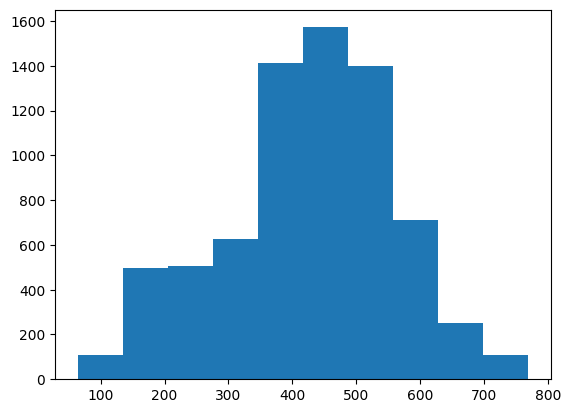

In [6]:
plt.hist(labels)
plt.show()

In the next steps we will build a Neural Network regression model to be able to predict species diversity based on our defined features. Once trained we will therefore be able to predict species diversity for any site for which we can compile these features. Given that the features are all based on spatial rasters that cover the whole globe, this means that it will work in theory for any given point in space. However, a model trained based on data from mostly Eastern Australia can't be meaningfully applied to predict diversity in e.g. North America. We will explore this a little by quantifying the prediction uncertainty of the model.

While the values that can be used to train an NN regression model can theoretically take any range, it generally helps the model to converge when rescaling these values to a smaller range, approximately ranging between 0 to 1. Below is a function that you can use to rescale any given 2D array. Rescaling is applied individually to each column and the output of the function is the rescaled array, as well as the original min-values and max-values of each column. These min and max arrays are needed to convert the data back to normal if desired, but this is not needed in this example. This scaling method is called min-max scaling and is also implemented in the sklearn machine learning library, which you may have used earlier in the course.

In [7]:
# This is a function that let's you rescale your data array. It rescales all values in each column to a range between 0 and 1.
def min_max_scaler(x, min_array=None, max_array=None, inverse_scale=False):
    if inverse_scale:
        x_new = x*(max_array-min_array)+min_array
        return(x_new)
    else:
        min_array = np.min(x,axis=0)
        max_array = np.max(x,axis=0)
        x_new = (x - min_array)/(max_array - min_array)
        return(x_new,min_array,max_array)

Now let's apply this function to our 2D feature array:

In [8]:
# Rescale features
rescaled_features, scale_min, scale_max = min_max_scaler(features)

# This is how you would transform the array back to normal
#min_max_scaler(rescaled_features, scale_min, scale_max, inverse_scale=True)


For our labels we'll apply a different scaling mechanism. For simplicity, we simply divide them by 800, which is close to value of the largest species diversity value in the dataset, leading approximately to a range between 0 and 1. This means that we need to multiply any diversity prediction made by our model by the factor 800 to get the real diversity estimate.

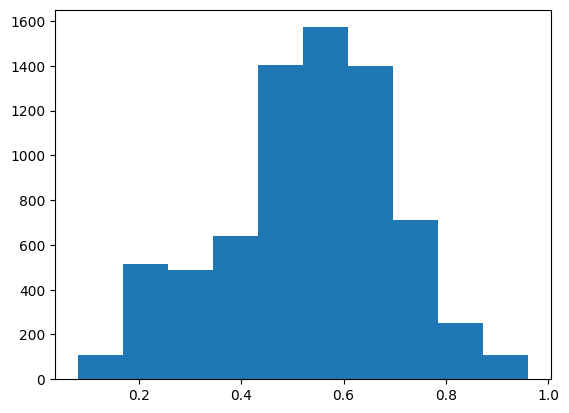

In [9]:
rescaled_labels = labels/800
plt.hist(rescaled_labels)
plt.show()

Next we want to select training, validation, and test set. Here is a custom function that does that and which also shuffles the instances. The function outputs arrays with the indices of the selected training, validation, and test instances.

In [8]:
def select_train_val_test(x,val_fraction=0.2,test_fraction=0.2,shuffle=True,seed=None):
    all_indices = np.arange(len(x))
    if shuffle:
        if not seed:
            seed = np.random.randint(0,999999999)
        # shuffle all input data and labels
        np.random.seed(seed)
        print('Shuffling data, using seed', seed)
        shuffled_indices = np.random.choice(all_indices, len(all_indices), replace=False)
    else:
        shuffled_indices = all_indices
    # select train, validation, and test data
    n_test_instances = np.round(len(shuffled_indices) * test_fraction).astype(int)
    n_validation_instances = np.round(len(shuffled_indices) * val_fraction).astype(int)
    test_ids = shuffled_indices[:n_test_instances]
    validation_ids = shuffled_indices[n_test_instances:n_test_instances + n_validation_instances]
    train_ids = shuffled_indices[n_test_instances + n_validation_instances:]
    return train_ids, validation_ids, test_ids


Now we run the function and apply the selected indices to our data.

In [9]:
# Separate instances into train and test set
train_set_ids, validation_set_ids, test_set_ids =  select_train_val_test(rescaled_features)
train_features = rescaled_features[train_set_ids]
train_labels = rescaled_labels[train_set_ids]
validation_features = rescaled_features[validation_set_ids]
validation_labels = rescaled_labels[validation_set_ids]
test_features = rescaled_features[test_set_ids]
test_labels = rescaled_labels[test_set_ids]


Shuffling data, using seed 507878881


### Defining a model
Now let's build the tensorflow model. This is essentially the same structure that we discussed in the lecture slides, except that we are using some more nodes and one extra hidden layer. Feel free to play around with the number of nodes and the number of layers. The loss function we are using is specified as `'mae'` which stands for "mean absolute error".

In [10]:
architecture = []

# Input layer
architecture.append(tf.keras.layers.Flatten(input_shape=[train_features.shape[1]]))
# 1st hidden layer
architecture.append(tf.keras.layers.Dense(32, activation='relu'))
# 2nd hidden layer
architecture.append(tf.keras.layers.Dense(8, activation='relu'))
# Output layer
architecture.append(tf.keras.layers.Dense(1, activation='softplus'))  # sigmoid or tanh or softplus

# Compile the model
model = tf.keras.Sequential(architecture)
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

# Get overview of model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 26)                0         
                                                                 
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1137 (4.44 KB)
Trainable params: 1137 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


At this point the model is not yet trained with our training data, i.e. the weights are not at all optimized yet. But for demonstration purposes we can use it already to make predictions for our data, even if these are completely random at this point. For now let us make predictions for our test data, and compare later on how much better the trained model predicts them. You can predict with a defined model using `model.predict`:

In [11]:
estimated_test_labels = model.predict(test_features)

45/45 [==============================] - 0s 414us/step


For regression tasks, a common data exploration tool is to plot the estimated labels against the true labels. This will given an idea how well the model is doing with the prediction task. Here is a simple plotting function to create this type of plot:

In [12]:
def plot_true_vs_pred(true_labels, predicted_labels):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(true_labels, predicted_labels, 'o', markersize=3, alpha=1)
    plt.plot([0,800],[0,800],'r-')
    plt.grid()
    plt.xlabel('True diversity')
    plt.ylabel('Predicted diversity')


Now we run this function on our predicted labels for the test set, after converting these back to the original scale by multiplying with the factor 800 (our rescaling factor that we used for transforming the biodiversity labels at the beginnig).

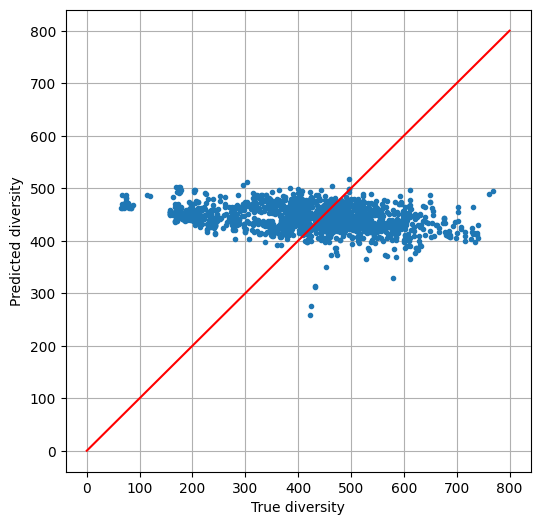

In [13]:
plot_true_vs_pred(test_labels*800,estimated_test_labels*800)

As expected, our untrained model is not doing a good job in predicting. In a case of well predicted labels the points in this scatter point would be located around the center diagonal.

### Training the model

It is now time to fit our model to the training data (= train our model), using `model.fit`. The number of epochs defines for how many epochs your model is training (optimizing the weights). Early stopping is a handy setting, that stops the training if the validation accuracy does not improve for N consecutive epochs. N can be set using the patience parameter. We specify that we will be monitoring `val_mae`, which stands for the mean absolute error for the validation set. Whenever you use early stopping, make sure you set the `restore_best_weights` setting to True, otherwise it will keep the weights of the last epoch, instead of the best epoch.

In [ ]:
# Define early stop of training based on validation set
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mae',patience=200,restore_best_weights=True)
# Run model training and store training history
history = model.fit(train_features,
                          train_labels,
                          epochs=3000,
                          validation_data=(validation_features, validation_labels),
                          verbose=1,
                          callbacks=[early_stop],
                          batch_size=40)

Here is a plotting function that allows us to plot the history of the model training more conveniently. The plot will show the best identified method by the early stopping setting, which is marked with a dashed grey line. This is the epoch for which the model exported the weights.

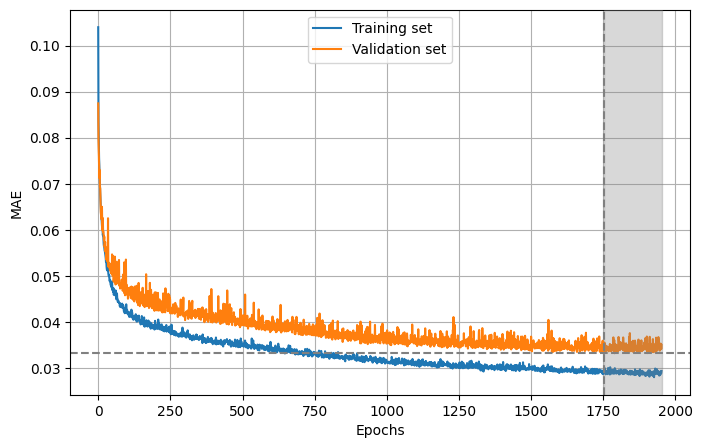

In [15]:
def plot_training_history(history, show_best_epoch=True):
    fig = plt.figure(figsize=(8, 5))
    plt.plot(history.history['mae'], label='Training set')
    plt.plot(history.history['val_mae'], label='Validation set')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    if show_best_epoch:
        best_epoch = np.where(history.history['val_mae'] == np.min(history.history['val_mae']))[0][0]
        plt.axvline(best_epoch, c='grey', linestyle='--')
        plt.axhline(history.history['val_mae'][best_epoch], c='grey', linestyle='--')
        plt.gca().axvspan(best_epoch, len(history.history['mae']), color='grey', alpha=0.3, zorder=3)
    plt.grid()
    plt.legend(loc='upper center')

plot_training_history(history)

We can see that the model stopped training after there has been no validation MAE improvement for 200 consecutive epochs. Our model now has the weights from the epoch marked by the grey dashed line.

It's always a good idea to save your trained model, which you can do very easily with `model.save()`:

In [16]:
# You can save the model to a file and later load it
model_file = 'data/trained_model'
model.save(model_file)
# This is how you load the model
#model = tf.keras.models.load_model(model_file)

INFO:tensorflow:Assets written to: data/trained_model/assets


INFO:tensorflow:Assets written to: data/trained_model/assets


We can now use the trained model to make predictions given our features as input. Let's make predictions for the test set:

In [17]:
test_features

array([[1.03372603e-02, 2.12491951e-01, 6.71767573e-01, ...,
        3.99082569e-01, 9.33786078e-02, 5.42655756e-01],
       [3.23400323e-03, 7.98454604e-02, 7.61346283e-01, ...,
        4.23328965e-01, 9.50764007e-02, 3.72730605e-01],
       [2.69500270e-04, 9.01481005e-03, 5.91286650e-01, ...,
        1.60550459e-01, 2.54668930e-02, 5.54238599e-01],
       ...,
       [5.74805575e-02, 2.64649066e-01, 9.65416731e-01, ...,
        3.25688073e-01, 3.61629881e-01, 6.71963087e-01],
       [2.36967737e-02, 1.51963941e-01, 8.94089512e-01, ...,
        1.10091743e-01, 2.03735144e-01, 1.63349501e-01],
       [2.27342727e-02, 1.06245976e-01, 7.45053432e-01, ...,
        2.09698558e-02, 1.47707980e-01, 2.86513864e-01]])

In [18]:
estimated_test_labels = model.predict(test_features)

45/45 [==============================] - 0s 457us/step


Now let us see how well our trained model is doing with predicting species diversity by creating a scatter plot with the test set predictions. Mind that the test set consists of data that our model has never seen before. It seems like our model is doing a decent job with the predictions, since they largely align with the true labels for these instances.

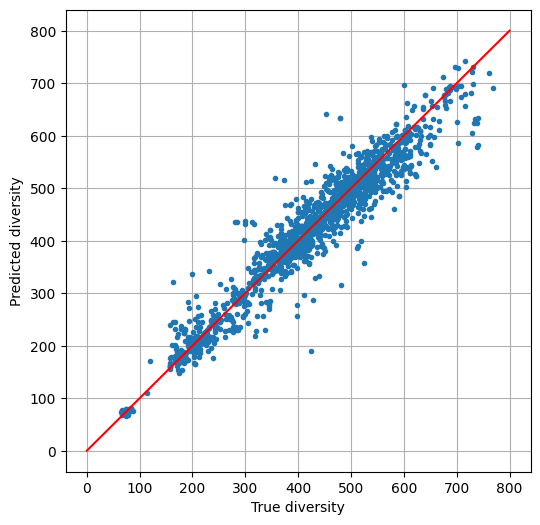

In [19]:
plot_true_vs_pred(test_labels*800,estimated_test_labels*800)

This is looking much better now. Compare this to our previous plot produced with the untrained model. You can see that during training the weights have been truly optimized towards the task of predicting species diversity, as almost all points are close to the center diagonal. We now have a model that can predict species diversity for any given point. This allows you for example to create continuous maps of species diversity, by defining a grid and predicting diversity for each grid cell. If you're interested you can check out [this preprint](https://doi.org/10.1101/2022.01.12.475997) to see what these predictions look like for a grid spanning the complete continent.

For a proper evaluation of the predictions, people usually report the mean absolute error (MAE),  mean absolute percentage error (MAPE), or mean squared error (MSE) (or some other equivalent). Let us calculate the **mean absolute percentage error (MAPE)** here, since it scales with the absolute values.

In [20]:
mape = np.mean(np.abs((estimated_test_labels.flatten() - test_labels.flatten())/test_labels.flatten()))
print('The mean absolute percentage error of the trained model is %.4f'%mape)

The mean absolute percentage error of the trained model is 0.0677


This means that, on average, our diversity predictions are off by around 6.77%.

### Uncertainty quantification using MC dropout
As we discussed in the lecture, the predictions made by regular NN models represent point estimates. While our prediction accuracy that we reached above is decent, this accuracy is based on a single estimate. Also, as it is right now, our model will predict diversity for any point, regardless whether the input feature data for that point are completely outside of the range of anything the model has ever been trained on. We want a way for our network to quantify how confident it is in its' predictions. This is where we can apply **MC dropout**.

First we need to redesing our NN model, adding dropout to our layers. You can put dropout on any layer you want, except for the output layer. Here I will add dropout to each of the two hidden layers. Here I'm using the dropout rates 0.2 and 0.1, telling the model to randomely drop 20% and 10% of the first and second layer, respectively.

In [21]:
architecture = []
# Input layer
architecture.append(tf.keras.layers.Flatten(input_shape=[train_features.shape[1]]))
# First hidden layer
architecture.append(tf.keras.layers.Dense(32, activation='relu'))
architecture.append(tf.keras.layers.Dropout(0.2))
#architecture.append(MCDropout(0.2))
# 2nd hidden layer
architecture.append(tf.keras.layers.Dense(8, activation='relu'))
architecture.append(tf.keras.layers.Dropout(0.1))
#architecture.append(MCDropout(0.1))
# Output layer
architecture.append(tf.keras.layers.Dense(1, activation='softplus'))  # sigmoid or tanh or softplus
# Compile the model
model = tf.keras.Sequential(architecture)
model.compile(loss='mae', optimizer='adam', metrics=['mae','mape','mse','msle'])
# Get overview of model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 26)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                864       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1137 (4.44 KB)
Trainable params: 1137 (4

______

**TASK:** Train the model with our training data in the same way as we did before for the regular model. Produce the training history plot that is shown below.

______

In [ ]:
# Define early stop of training based on validation set
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mae',patience=200,restore_best_weights=True)
# Run model training and store training history
history = model.fit(train_features,
                          train_labels,
                          epochs=3000,
                          validation_data=(validation_features, validation_labels),
                          verbose=1,
                          callbacks=[early_stop],
                          batch_size=40)

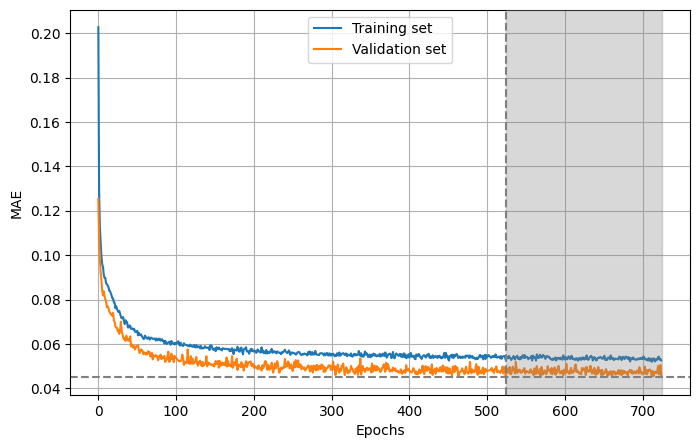

In [23]:
model_file = 'data/trained_model_dropout'
model = tf.keras.models.load_model(model_file)

plot_training_history(history)

As we talked about in the lecture, the training error (MAE) usually comes out higher than that of the validation set when using dropout. This is because the nodes are being dropped only for the training set predictions, but the validation set is unaffected by the specified dropout rates.

This time, when making predictions with our model, we will make them 100 times. You will see that each time the model predictions vary slightly, representing the uncertainty of the final model introduced by the dropped out nodes. To make sure that dropout is also applied to the predictions we have to use `model()` instead of `model.predict()` and set `training=True`.

In [24]:
mc_dropout_pred = np.stack([model(test_features,training=True) for i in np.arange(100)])
mc_dropout_mean = mc_dropout_pred.mean(axis=0)
mc_dropout_std = mc_dropout_pred.std(axis=0)

We will now plot these predictionsin the same way as before, but add the standard deviation of the predicted values for each test instance as an error bar, representing the uncertainty of the predictions.

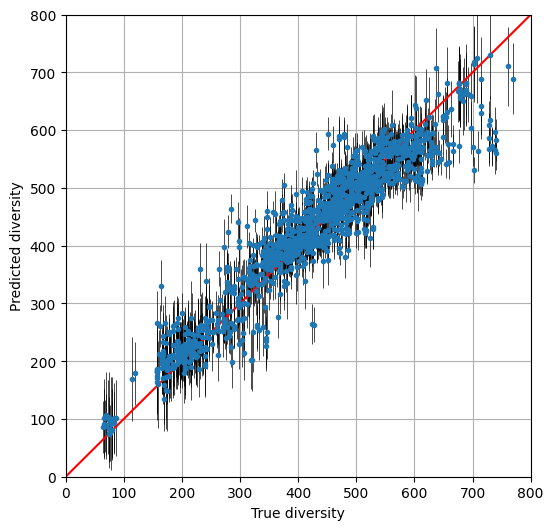

In [25]:
fig = plt.figure(figsize=(6, 6))
plt.errorbar(test_labels*800,mc_dropout_mean.flatten()*800, yerr=mc_dropout_std.flatten()*800, fmt='.',alpha=1,ecolor='black',elinewidth=0.5)
plt.xlim(0,800)
plt.ylim(0,800)
plt.plot([0,800],[0,800],'r-')
plt.xlabel('True diversity')
plt.ylabel('Predicted diversity')
plt.grid()


You see that there is quite some uncertainty surrounding the predictions of some of the test instances, for some more than for others. The error bars seem to get larger towards very small or veyr large diversity instances.

_____

**TASK:** Try some different settings for the NN model. You can alter the number of layers, number of nodes per layer, dropout settings (if and where to place dropout layers, as well as altering the dropout fraction). You can also alter the input data and try different sets of features, e.g. only using the climatic features (columns `bio1`-`bio19`), or only using non-climatic features. What is the best MAPE score you can reach for the test set? My best attempt after model testing resulted in a MAPE score of 0.0609, if you can beat that I will buy you a coffee on the next occasion ;-)

______

### Dimensionality reduction
In this exercise we used 26 features, most of which (N=19) represent different climatic variables. These climatic variable from the [worldclim](https://www.worldclim.org) database are highly correlated with each other. Therefore it might be beneficial for our model to first reduce these to fewer, less correlated variables, before training the model. This can be done using methods of dimensionality reduction, such as UMAP. Let's try this on our data. For this we first need to identify and extract the biome features from our dataset.

In [10]:
biome_feature_ids = [i for i,feat_name in enumerate(feature_names) if 'bio_' in feat_name]
biome_features = rescaled_features[:,biome_feature_ids]

Now we will use the UMAP Python library to reduce the multidimensional climate data into only two dimensions:

In [11]:
reducer = umap.UMAP(n_neighbors=250, min_dist=0)
umap_obj = reducer.fit(biome_features)
biome_features_transformed = reducer.transform(biome_features)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Now that we only have two climate axes (rather than 19), we can actually plot the data in a 2D scatterplot. So each site in our input data now has 2 instead of 19 climatic variables. To get an idea of how informative these climate axes are in determining species diversity, we color the points based on the species diversity at the site.

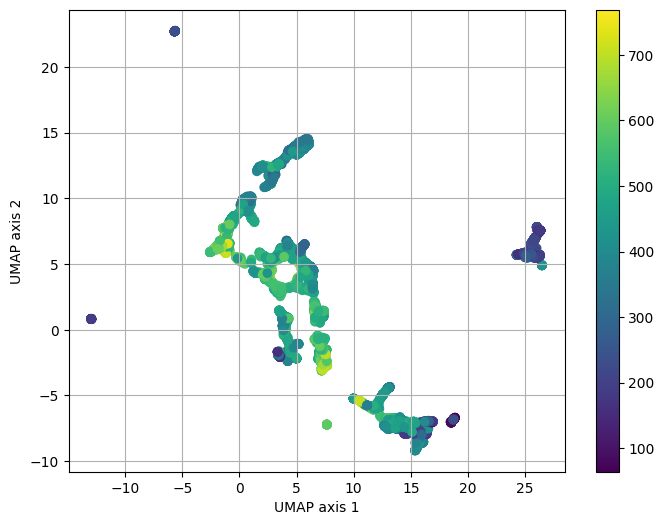

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(biome_features_transformed[:,0], biome_features_transformed[:,1], c=labels)
plt.colorbar()
plt.grid()
plt.xlabel('UMAP axis 1')
plt.ylabel('UMAP axis 2')
plt.show()

This is how you transform the data back to 19 dimensions. However, there will be some loss of information, i.e. the data won't look exactly as before, because they went through this information compression.

In [13]:
inv_transf = reducer.inverse_transform(biome_features_transformed)

We can compare the UMAP transformation to a regular principal component analysis (PCA), which is also a means of dimensionality reduction. The difference between UMAP and PCA is that the PCA assumes linear relationships between variables, while UMAP can represent non-linear relationships.

In [18]:
pca = PCA(n_components=2)
pca.fit(biome_features)
biome_features_pca_transformed = pca.transform(biome_features)


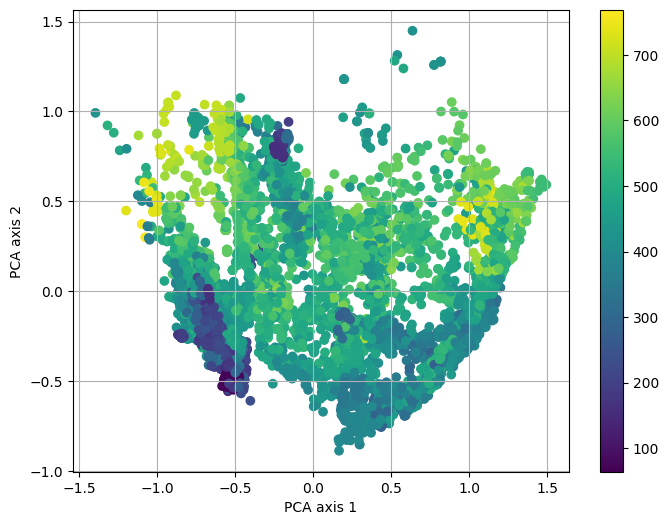

In [15]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(biome_features_pca_transformed[:,0], biome_features_pca_transformed[:,1], c=labels)
plt.colorbar()
plt.grid()
plt.xlabel('PCA axis 1')
plt.ylabel('PCA axis 2')
plt.show()

This is how you would transform the values back into 19 dimensions.

In [16]:
inv_transf_pca = pca.inverse_transform(biome_features_pca_transformed)


_____

**TASK:** Now run the NN training and prediction again (no dropout), but using the reduced feature set, i.e. the remaininig 7 non-climate features in combination with the 2-dimensional reduced climate features. Do this for both, the UMAP and PCA representation of the climate features, and compare the MAPE scores between the regular data (26 features), the UMAP data (7+2 features), and the PCA data (7+2 features). Did it help our model to reduce the dimensionalilty of the input data? Did one of the methods conserve the information content in the climatic features better than the other (compare MAPE between UMAP and PCA)?

The steps for this task are as follows:
1. Append 2 dimensionality-reduced climate features to remaining 7 non-climate features (using raw unscaled data). You can do this, using `np.hstack()`:
   
   ```new_feature_data = np.hstack([features[:,:6],features[:,-1].reshape(len(features),1),biome_features_transformed])```
2. Rescale feature array to values between 0 and 1
3. Separate data into training, validation, and test set
4. Define model architecture
5. Train model
6. Plot training history
7. Predict labels for test set
8. Make scatterplot between true and estimated test set labels
9. Calculate MAPE score

_____